In [1]:
%matplotlib inline 
from IPython.display import display 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
%load_ext watermark 
%watermark –v –p sklearn,numpy,scipy,matplotlib

ModuleNotFoundError: No module named 'watermark '

In [3]:

%watermark –v –p sklearn, numpy, scipy, matplotlib

UsageError: Line magic function `%watermark` not found.


In [4]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb_v1/newfile/train")
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[1]:\n", text_train[1])

text_train의 타입: <class 'list'>
text_train의 길이: 900
text_train[1]:
 b"Was this meant to be a comedy or a serious drama? This film starts with a light-hearted banter between three women. Fine. It moves into a conflict between the women when one of them meets a man. Fine. There are a few antics between them. Fine. But when the plot thickens and finally becomes black I started to wonder whether I had misinterpreted the first part of the movie. It continues in this vein for a while until, in the end, it tries to go back to the original light-hearted banter. But by now it's too late. It's hard to see why these women would still be talking to one another and the finale is unconvincing. Truly a lesson (for British filmmakers anyway) of how not to make films. Difficult to see how the producers ever convinced themselves this film would work. And the box office proved it to be a real flop, because I'd never heard of this film until this weekend (four years after its release)."


In [6]:
from sklearn.datasets import load_files
reviews_test = load_files("aclImdb_v1/newfile/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("text_train의 타입:", type(text_test))
print("text_train의 길이:", len(text_test))
print("text_train[1]:\n", text_test[1])

text_train의 타입: <class 'list'>
text_train의 길이: 600
text_train[1]:
 b"A mean spirited, repulsive horror film about 3 murderous children. Susan Strasberg is totally wasted in a 5-minute cameo, even though she receives star billing. If your a Julie Brown fan, you'll want to check it out, since she's naked in a couple of shots. All others,avoid."


In [7]:
text_train = [doc.replace(b"<br />", b"")for doc in text_train]

In [8]:
print("클래스 별 샘플 수(학습용 데이터):", np.bincount(y_train))

클래스 별 샘플 수(학습용 데이터): [300 300 300]


In [9]:
bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer( ) 
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [11]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:", vect.vocabulary_)

# 맨 처음 단어 0, 맨 끝 단어 13

어휘 사전의 크기: 13
어휘 사전의 내용: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [12]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [13]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [14]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <900x14872 sparse matrix of type '<class 'numpy.int64'>'
	with 117642 stored elements in Compressed Sparse Row format>


In [15]:
feature_names = vect.get_feature_names()
print("피처 개수:", len(feature_names))
print("처음 20개 피처:\n", feature_names[:20])
print("10010에서 10030까지 피처:\n", feature_names[10010:10030])
print("매 1000번째 피처:\n", feature_names[::1000])

피처 개수: 14872
처음 20개 피처:
 ['00', '000', '0079', '0080', '0083', '00pm', '04', '06', '08', '10', '100', '1000', '105', '10p', '10th', '11', '112', '12', '120', '123']
10010에서 10030까지 피처:
 ['possesses', 'possession', 'possibilities', 'possibility', 'possible', 'possibly', 'post', 'posted', 'poster', 'posterity', 'posture', 'postures', 'postwar', 'pot', 'potato', 'potatoes', 'potboiler', 'potemkin', 'potent', 'potentate']
매 1000번째 피처:
 ['00', 'atrocity', 'cameo', 'convincing', 'dong', 'fee', 'gushing', 'intent', 'madcap', 'norman', 'poses', 'retarded', 'sitka', 'sweden', 'unlikeable']


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression( ), X_train, y_train, cv=5) 
print("크로스밸리데이션평균점수:{:.2f}".format(np.mean(scores)))

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


크로스밸리데이션평균점수:0.73


In [17]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]} 
grid = GridSearchCV(LogisticRegression( ), param_grid, cv=5) 
grid.fit(X_train, y_train) 
print("크로스밸리데이션평균점수:{:.2f}".format(grid.best_score_)) 
print("최적의매개변수:", grid.best_params_) 

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


크로스밸리데이션평균점수:0.73
최적의매개변수: {'C': 10}


In [18]:
X_test = vect.transform(text_test)
print("테스트 점수:{:.2f}".format(grid.score(X_test, y_test)))

# text_test가 어디서 변수 생성을 했는지 몰라서 train과 비슷하게 작성했습니다.

테스트 점수:0.57


In [19]:
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <900x3372 sparse matrix of type '<class 'numpy.int64'>'
	with 98954 stored elements in Compressed Sparse Row format>


In [20]:
feature_names = vect.get_feature_names()

print("First 50 features:\n", feature_names[:50])
print("Features 2010 to 2030:\n", feature_names[2010:2030])
print("Every 500thfeature:\n", feature_names[::500])

First 50 features:
 ['000', '10', '100', '11', '12', '13', '15', '16', '1928', '1931', '1945', '1946', '1970', '1972', '1975', '1976', '1978', '1990', '1991', '1998', '1999', '1st', '20', '2001', '2003', '20s', '25', '30', '30s', '3d', '40', '50', '60', '70', '70s', '80', '80s', '90', '99', 'abiding', 'abilities', 'ability', 'able', 'about', 'above', 'abruptly', 'absence', 'absolute', 'absolutely', 'absurd']
Features 2010 to 2030:
 ['new', 'news', 'newspaper', 'next', 'nice', 'nicely', 'nick', 'nicolai', 'night', 'nightclub', 'nightmare', 'nightmares', 'nikita', 'nina', 'nine', 'niro', 'no', 'noble', 'nobody', 'noir']
Every 500thfeature:
 ['000', 'changed', 'even', 'impress', 'needs', 'road', 'those']


In [21]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수:{:.2f}".format(grid.best_score_))

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


최적의 크로스 밸리데이션 점수:0.71


In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어: \n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어: 
 ['besides', 'de', 'wherein', 'even', 'nor', 'thereafter', 'part', 'onto', 'put', 'as', 'sometime', 'system', 'any', 'very', 'you', 'once', 'thence', 'others', 'seeming', 'meanwhile', 'never', 'often', 'everywhere', 'has', 'again', 'after', 'couldnt', 'side', 'four', 'below', 'moreover', 'fire']


In [23]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <900x3107 sparse matrix of type '<class 'numpy.int64'>'
	with 57125 stored elements in Compressed Sparse Row format>


In [24]:
grid = GridSearchCV(LogisticRegression(),param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수:{:.2f}".format(grid.best_score_))

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


최적의 크로스 밸리데이션 점수:0.76


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline 
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression()) 
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5) 
grid.fit(text_train, y_train) 
print("최적의크로스밸리데이션점수:{:.2f}".format(grid.best_score_))

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\

최적의크로스밸리데이션점수:0.78


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"] 
X_train =vectorizer.transform(text_train) 
max_value = X_train.max(axis=0).toarray( ).ravel( ) 
sorted_by_tfidf = max_value.argsort( ) 
feature_names = np.array(vectorizer.get_feature_names( ))

print("가장낮은tfidf를가진피처:\n", feature_names[sorted_by_tfidf[:20]]) 
print("가장높은tfidf를가진피처:\n", feature_names[sorted_by_tfidf[-20:]])

가장낮은tfidf를가진피처:
 ['arrogant' 'empty' 'shooter' 'infamous' 'pushed' 'ralli' 'enters'
 'influence' 'eyed' 'blow' 'prevent' 'deliver' 'decision' '1975' 'lying'
 'hired' '1976' 'limited' 'raw' 'disgruntled']
가장높은tfidf를가진피처:
 ['leon' 'carmen' 'stooges' 'choose' 'ring' 'showed' 'cd' 'book' 'foreign'
 '3d' 'davies' 'game' 'busy' 'nikita' 'walken' 'zombie' 'danish' 'jill'
 'match' 'master']


In [27]:
sorted_by_idf = np.argsort(vectorizer.idf_) 
print("가장 낮은 idf를 가진 피처:\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 피처:
 ['the' 'and' 'of' 'to' 'this' 'it' 'in' 'is' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'are' 'film' 'one' 'not' 'be' 'you' 'have' 'at'
 'all' 'an' 'from' 'by' 'who' 'so' 'like' 'they' 'there' 'if' 'about'
 'has' 'just' 'or' 'out' 'he' 'his' 'when' 'some' 'good' 'very' 'what'
 'can' 'more' 'see' 'up' 'story' 'her' 'time' 'even' 'would' 'only' 'no'
 'me' 'my' 'had' 'really' 'their' 'well' 'which' 'were' 'great' 'much'
 'how' 'than' 'been' 'made' 'also' 'other' 'do' 'she' 'get' 'because'
 'will' 'into' 'don' 'first' 'after' 'way' 'people' 'make' 'life' 'we'
 'could' 'too' 'two' 'most' 'movies' 'watch' 'many' 'then' 'any' 'them'
 'character' 'acting' 'love']


In [28]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[ 0.00846948,  0.99297586,  0.25650939, ...,  0.80998689,
         0.88276624,  1.01713418],
       [ 0.01251199, -1.04310503,  0.18638748, ..., -0.38570893,
         0.66821379, -0.50469146],
       [-0.0722161 ,  0.09895587, -0.43867875, ..., -0.46646756,
        -1.85013484, -0.53662863]])

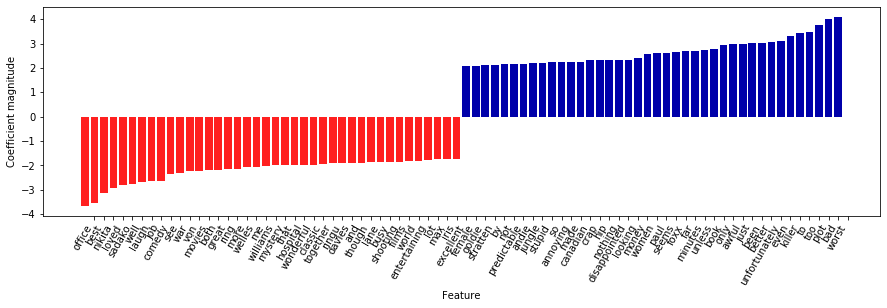

In [29]:
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps["logisticregression"].coef_[0],
feature_names, n_top_features=40)

In [30]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [31]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [32]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 14
어휘 사전:
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [33]:
print("변환된 데이터 (밀집 배열):\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [34]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 39
어휘 사전:
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [43]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression()) 
param_grid = {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1,1), (1,2), (1,3)]} 
grid = GridSearchCV(pipe, param_grid, cv=5) 
grid.fit(text_train, y_train) 
print("최상의크로스배리데이션점수: {:.2f}".format(grid.best_score_)) 
print("최적의매개변수:\n", grid.best_params_)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\

최상의크로스배리데이션점수: 0.78
최적의매개변수:
 {'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 1)}


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


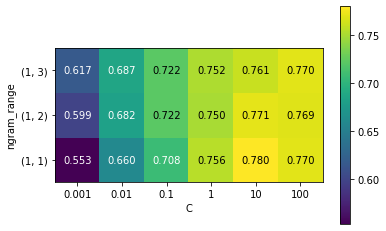

In [36]:
scores = grid.cv_results_["mean_test_score"].reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(
scores, xlabel = "C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
xticklabels=param_grid["logisticregression__C"],
yticklabels = param_grid["tfidfvectorizer__ngram_range"])
plt.colorbar(heatmap)

(-22, 22)

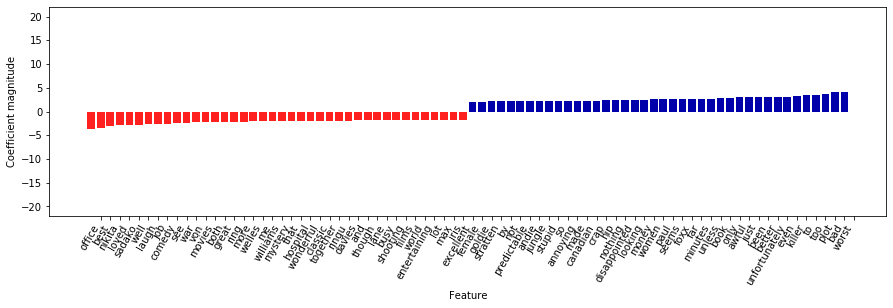

In [37]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer'] 
feature_names = np.array(vect.get_feature_names( )) 
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40) 
plt.ylim(-22, 22)

In [38]:
!python -m spacy download en_core_web_sm

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011743 sha256=9c63964187c8931b1e5137c3ccd1706ae84fd407544a2befc21a94038e885e9d
  Stored in directory: C:\Users\user\AppData\Local\Temp\pip-ephem-wheel-cache-bfilohhl\wheels\51\19\da\a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [39]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import nltk
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = nlp(doc)
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    print("어간 :")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [41]:
compare_normalization("Our meeting today was worse than yesterday.""I'm scared of meeting the clients tomorrow.")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', '.', "I'm", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간 :
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', '.', "i'm", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
